# 카톡 채팅 분석 3

# Data Load
---

In [1]:
f = open("C://Users//user//Github/Project_Kakao chat/카톡대화.txt", "r" , encoding = "utf-8")
all_chat = []
for line in f :
    all_chat.append(line.replace("\n",""))
f.close()

In [2]:
all_chat

['신성재 님과 카카오톡 대화',
 '저장한 날짜 : 2020-02-27 01:47:43',
 '',
 '--------------- 2017년 1월 19일 목요일 ---------------',
 '[김성화] [오전 2:16] 오 팁 이만냥 받음',
 '[김성화] [오전 2:16] 재민 그동네 좀 좋네',
 '[김재민] [오전 2:19] 오',
 '[김재민] [오전 2:19] 난 카지노 3만원잃음',
 '[김재민] [오전 2:19] ㅋㅋㅋ',
 '[김성화] [오전 2:21] ㅋㅋ븅신',
 '[김재민] [오전 2:21] ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '[김재민] [오전 2:21] 여기 한심하게돈많은놈들많더',
 '[김재민] [오전 2:21] 개부럽',
 '[김성화] [오전 2:22] ㅋㅋㅋ그새끼들 연락처받아놔라',
 '[김재민] [오전 2:26] ㅋㅋㅋㅋㅋ',
 '[김재민] [오전 2:26] 근데좀무섭게생겻다',
 '[김성화] [오전 2:28] ㅋㅋㅋ그런애들 아빠가 콤마 틀라이언트 계약해주실수도있다',
 '[김재민] [오전 2:29] 오',
 '[김재민] [오전 2:29] 상하이 선화',
 '[김성화] [오전 2:35] ㅣ번 여름방학땐',
 '[김성화] [오전 2:35] 콤마 팀들 ㅗㅇ모전이고 나발이고 집어치고',
 '[김성화] [오전 2:35] 중국어공부시켜라',
 '[김재민] [오전 2:36] ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 '[김재민] [오전 2:36] 해외진출',
 '[김성화] [오전 2:37] 아 알바 마치고싶다..',
 '[김재민] [오전 2:38] 마쳐라',
 '[김성화] [오전 2:40] 피고내피고내',
 '[김신기] [오전 11:28] 재민아 토트넘 경기 어떤 사이트 통해서 예매햇냐',
 '[김성화] [오후 1:13] 쿠팡',
 '[김신기] [오후 2:24] 재미 읽씹하냐 ㅜㅜ',
 '[김재민] [오후 2:24] 아니기달',
 '[김재민] [오후 2:25] 나아직못삿어',
 '[김재민] [오후 2:25] 런던즐겨찾기',
 '[김재민] [오후 2:25] 거

In [3]:
len(all_chat)

152922

In [4]:
all_chat[5]

'[김성화] [오전 2:16] 재민 그동네 좀 좋네'

In [5]:
err = []
name = []
time = []
text = []

for chat in all_chat :
    temp = chat.split("] ")
    if len(temp) == 3:
        name.append(temp[0].replace('[',""))
        time.append(temp[1].replace('[',""))
        text.append(temp[2])
        
    else :
        err.append(chat)

In [6]:
from collections import Counter
count = Counter()

In [7]:
temp = " ".join(text).split(" ")

In [8]:
words = Counter(temp).most_common(100000)

In [9]:
word_dict = dict()
word_dict["a"] = "Ah!"

In [10]:
word_dict["a"]

'Ah!'

In [11]:
words[:10]

[('사진', 5157),
 ('근데', 2061),
 ('나', 1825),
 ('아', 1545),
 ('ㅋㅋㅋ', 1397),
 ('', 1310),
 ('이모티콘', 1309),
 ('아니', 1215),
 ('오늘', 1194),
 ('ㅇㅇ', 1186)]

In [12]:
for word in words :
    word_dict[word[0]] = word[1]    

In [13]:
word_dict["사진"]

5157

# WordCloud
---

In [14]:
!pip install Pillow wordcloud palettable

In [15]:
import numpy as np
import random # 색깔을 랜덤하게 칠하기 위해
from PIL import Image # 이미지 마스크를 위해
from wordcloud import WordCloud, STOPWORDS
from palettable.colorbrewer.qualitative import Dark2_8 # 색상설정을 위해

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

font_path = "C:/Users/user/Github/NanumSquareB.ttf"

icon = "cloud"
icon_path = "C:/Users/user/Github/Project_Kakao chat/cloud.png"

icon = Image.open(icon_path).convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path=font_path, background_color = "white", max_words=2000, mask=mask,
              max_font_size=300, random_state=42)

wc.generate_from_frequencies(word_dict)
wc.recolor(color_func=color_func, random_state=3)
wc.to_file("wordcloud.png")

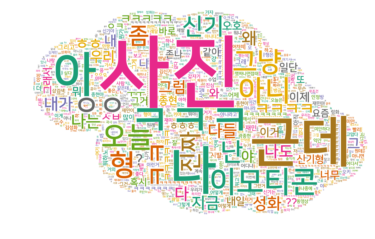

In [16]:
import matplotlib.pyplot as plt
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C://Users//user/Github/NanumSquareB.ttf").get_name()
rc('font', family=font_name)

# 최빈단어
---

In [18]:
top_words = words[:11]

In [19]:
top_words[5]

('', 1310)

In [20]:
del top_words[5]
top_words

[('사진', 5157),
 ('근데', 2061),
 ('나', 1825),
 ('아', 1545),
 ('ㅋㅋㅋ', 1397),
 ('이모티콘', 1309),
 ('아니', 1215),
 ('오늘', 1194),
 ('ㅇㅇ', 1186),
 ('형', 1184)]

In [21]:
real_top_words = []
count = []
for word in top_words :
    real_top_words.append(word[0])
    count.append(word[1])
print(real_top_words,count)

['사진', '근데', '나', '아', 'ㅋㅋㅋ', '이모티콘', '아니', '오늘', 'ㅇㅇ', '형'] [5157, 2061, 1825, 1545, 1397, 1309, 1215, 1194, 1186, 1184]


In [22]:
import pandas as pd
df = pd.DataFrame(data = top_words, columns = ("단어","단어수"))
df

,단어,단어수
0,사진,5157
1,근데,2061
2,나,1825
3,아,1545
4,ㅋㅋㅋ,1397
5,이모티콘,1309
6,아니,1215
7,오늘,1194
8,ㅇㅇ,1186
9,형,1184


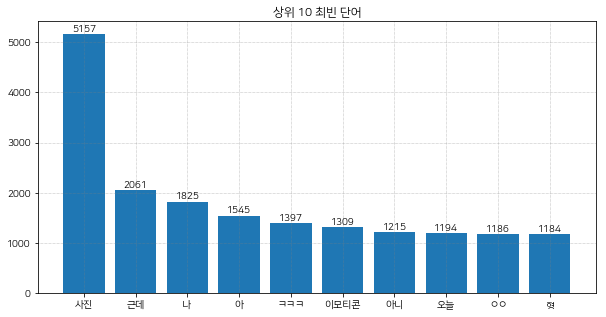

In [23]:
plt.figure(figsize=(10,5))
plt.grid(color="grey",linestyle=":", linewidth=0.5)
plt.bar(real_top_words,count)
plt.title("상위 10 최빈 단어")

n = df["단어"]
s = df["단어수"]

for i in range(len(s)):
    plt.annotate(str(s[i]), xy=(n[i],s[i]+10), ha='center', va='bottom')

# plt.show()
plt.savefig("graph.png",bbox_inches="tight")

# 자연어 처리
---

In [24]:
# 한글 형태소 분석 모튤 설치
!pip install konlpy

# numpy 버젼이 낮아서 발생하는 문제 해결 - 모듈 업데이트 (numpy.core.multiarray failed to import)
!pip install -U numpy 

# jpype1 0.7.1일 시에 오류 발생 따라서 다운그레이드
!pip install jpype1==0.7.0

Requirement already up-to-date: numpy in c:\programdata\anaconda3\lib\site-packages (1.18.1)


In [40]:
from konlpy.tag import Okt

In [41]:
# 데이터 프레임화
import pandas as pd
a = pd.DataFrame(name)
b = pd.DataFrame(time)
c = pd.DataFrame(text)

In [42]:
a.columns = ["name"]
b.columns = ["time"]
c.columns = ["text"]

df = pd.concat([a,b,c],axis=1)
df[:10]

,name,time,text
0,김성화,오전 2:16,오 팁 이만냥 받음
1,김성화,오전 2:16,재민 그동네 좀 좋네
2,김재민,오전 2:19,오
3,김재민,오전 2:19,난 카지노 3만원잃음
4,김재민,오전 2:19,ㅋㅋㅋ
5,김성화,오전 2:21,ㅋㅋ븅신
6,김재민,오전 2:21,ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
7,김재민,오전 2:21,여기 한심하게돈많은놈들많더
8,김재민,오전 2:21,개부럽
9,김성화,오전 2:22,ㅋㅋㅋ그새끼들 연락처받아놔라


In [43]:
okt = Okt()
okt.pos(text[0])

[('오', 'Noun'), ('팁', 'Noun'), ('이만', 'Noun'), ('냥', 'Josa'), ('받음', 'Verb')]

In [44]:
df["text"][0]

'오 팁 이만냥 받음'

In [45]:
# 100개로 한정
df2 = df[0:1000]

In [46]:
okt = Okt()
for i in range(len(df2)) : 
    df2["text"][i] = okt.pos(df2["text"][i])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [47]:
df2.head()

,name,time,text
0,김성화,오전 2:16,"[(오, Noun), (팁, Noun), (이만, Noun), (냥, Josa), ..."
1,김성화,오전 2:16,"[(재민, Noun), (그, Determiner), (동네, Noun), (좀, ..."
2,김재민,오전 2:19,"[(오, Noun)]"
3,김재민,오전 2:19,"[(난, Noun), (카지노, Noun), (3만원, Number), (잃음, F..."
4,김재민,오전 2:19,"[(ㅋㅋㅋ, KoreanParticle)]"


In [33]:
df2["text"].head()

0    [(오, Noun), (팁, Noun), (이만, Noun), (냥, Josa), ...
1    [(재민, Noun), (그, Determiner), (동네, Noun), (좀, ...
2                                          [(오, Noun)]
3    [(난, Noun), (카지노, Noun), (3만원, Number), (잃음, F...
4                              [(ㅋㅋㅋ, KoreanParticle)]
Name: text, dtype: object

In [48]:
morphs = []
for i in range(len(df2)):
    morphs.extend(df2["text"][i])

In [49]:
morphs[:10]

[('오', 'Noun'),
 ('팁', 'Noun'),
 ('이만', 'Noun'),
 ('냥', 'Josa'),
 ('받음', 'Verb'),
 ('재민', 'Noun'),
 ('그', 'Determiner'),
 ('동네', 'Noun'),
 ('좀', 'Noun'),
 ('좋네', 'Adjective')]

In [36]:
len(morphs)

3165

In [37]:
count = Counter(morphs)
count.most_common(10)

[(('?', 'Punctuation'), 63),
 (('사진', 'Noun'), 53),
 (('나', 'Noun'), 32),
 (('에', 'Josa'), 31),
 (('이', 'Josa'), 27),
 (('ㅋㅋㅋ', 'KoreanParticle'), 25),
 (('뭐', 'Noun'), 24),
 (('거', 'Noun'), 21),
 (('..', 'Punctuation'), 20),
 (('가', 'Josa'), 19)]

['NanumGothic']


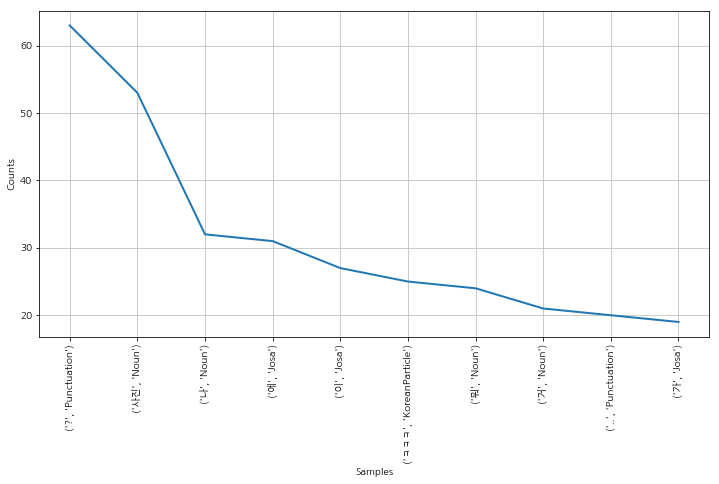

In [50]:
# 그래프 삽입 모듈 및 그래프 내 한글 폰트 삽입 코드
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

# 단어 수로 그래프 그리기
import nltk
plt.figure(figsize=(12,6))
words = nltk.Text(morphs, name='단어 빈도수')
words.plot(10)
plt.show()